# Analyzing Quantum Volume Routing Attempts
This notebook analyzes the effect of using multiple routing attempts and picking the bestone for the Quantum Volume algorithmat a particular depth. For a given m = depth = number of qubits, plot the HOG for a range of routing attempts.

In [23]:
# Configuration parameters. Feel free to mess with these!

import cirq

num_circuits = 10
depth = 4
routing_attempts = range(1, 100, 10) # [1, 6, 11, 16, 21, 26, 31]
device = cirq.google.Bristlecone
compiler = lambda circuit: cirq.google.optimized_for_xmon(
    circuit=circuit,
    new_device=device)

print(f"Configuration: depth {depth} with "
      f"{num_circuits} circuits of routing attempts {routing_attempts}")

Configuration: depth 4 with 25 circuits of routing attempts range(1, 15)


In [24]:
# Run the Quantum Volume algorithm over the above parameters.

import numpy as np
from cirq.contrib import quantum_volume

samplers = [
        cirq.DensityMatrixSimulator(noise=cirq.ConstantQubitNoiseModel(
        qubit_noise_gate=cirq.DepolarizingChannel(p=.005)))]

results = []
for r in routing_attempts:
    print(f"Running with {r} routing attempt(s)")
    results.append(quantum_volume.calculate_quantum_volume(num_circuits=num_circuits,
                            depth=depth,
                            num_qubits=depth,
                            device=device,
                            samplers=samplers,
                            compiler=compiler,
                            seed=None,
                            routing_attempts=r))

Running with 1 routing attempt(s)
Computing heavy sets
  Circuit 1 Heavy Set: [1, 3, 4, 7, 8, 9, 10, 13]
  Circuit 2 Heavy Set: [1, 3, 4, 10, 12, 13, 14, 15]
  Circuit 3 Heavy Set: [0, 1, 2, 7, 8, 9, 11, 12]
  Circuit 4 Heavy Set: [0, 1, 2, 4, 6, 9, 14, 15]
  Circuit 5 Heavy Set: [1, 2, 3, 8, 10, 11, 14, 15]
  Circuit 6 Heavy Set: [2, 6, 7, 8, 12, 13, 14, 15]
  Circuit 7 Heavy Set: [0, 1, 2, 4, 8, 9, 11, 14]
  Circuit 8 Heavy Set: [0, 2, 5, 7, 8, 12, 13, 15]
  Circuit 9 Heavy Set: [1, 2, 6, 8, 11, 12, 13, 14]
  Circuit 10 Heavy Set: [0, 3, 5, 9, 11, 13, 14, 15]
  Circuit 11 Heavy Set: [0, 2, 3, 11, 12, 13, 14, 15]
  Circuit 12 Heavy Set: [0, 1, 3, 4, 6, 8, 9, 12]
  Circuit 13 Heavy Set: [0, 2, 3, 5, 6, 7, 10, 11]
  Circuit 14 Heavy Set: [1, 2, 3, 5, 6, 8, 13, 14]
  Circuit 15 Heavy Set: [1, 2, 7, 9, 10, 12, 13, 15]
  Circuit 16 Heavy Set: [0, 4, 5, 8, 9, 12, 13, 15]
  Circuit 17 Heavy Set: [2, 3, 4, 6, 8, 10, 12, 14]
  Circuit 18 Heavy Set: [6, 7, 8, 10, 11, 12, 13, 14]
  Circuit 19 He

Text(0.5, 0.98, 'HOG probability by number of routing attempts for d=4')

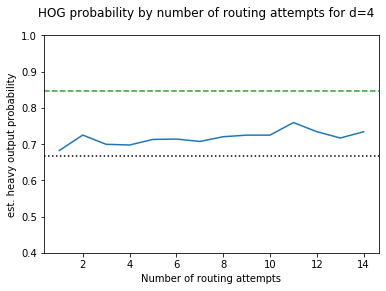

In [25]:
# Create a chart that plots the HOG rate relative to the simulated error ratio.

from matplotlib import pyplot as plt
import statistics

probs = []
for idx, r in enumerate(routing_attempts):
    result = results[idx]
    probs.append(statistics.mean([res.sampler_result for res in result]))

fig, axs = plt.subplots()
axs.plot(routing_attempts, probs)

# Line markers for asymptotic ideal heavy output probability and the ideal Heavy
# Output Generation threshold.
axs.axhline((1 + np.log(2)) / 2,
            color='tab:green',
            label='Asymptotic ideal',
            linestyle='dashed')
axs.axhline(2 / 3, label='HOG threshold', color='k', linestyle='dotted')
axs.set_ybound(0.4, 1)
axs.set_xlabel("Number of routing attempts")
axs.set_ylabel("est. heavy output probability")
fig.suptitle(f'HOG probability by number of routing attempts for d={depth}')